In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import set_option
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Extracting Features

In [45]:
path="Data/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))


561


## Reading train data

In [48]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features
# print(train_df)

train_df["subject_id"] = pd.read_csv(path+"train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
# #return data in pandas series format

train_df["activity"] = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.28,-0.02,-0.12,-1.0,-0.98,-0.96,-1.0,-0.97,-0.96,-0.94,...,0.05,-7.43e-03,-0.73,0.70,-0.84,0.18,-0.05,1,5,STANDING
1,0.28,-0.02,-0.11,-1.0,-0.97,-0.98,-1.0,-0.96,-0.98,-0.94,...,-0.12,1.78e-01,0.10,0.81,-0.85,0.18,-0.05,1,5,STANDING
2,0.28,-0.03,-0.12,-1.0,-0.98,-0.99,-1.0,-0.98,-0.99,-0.94,...,-0.04,-1.29e-02,0.64,-0.49,-0.85,0.18,-0.05,1,5,STANDING
3,0.28,-0.02,-0.12,-1.0,-0.98,-0.99,-1.0,-0.98,-0.99,-0.94,...,0.12,1.23e-01,0.69,-0.62,-0.85,0.19,-0.04,1,5,STANDING
4,0.28,-0.01,-0.11,-1.0,-0.99,-1.00,-1.0,-0.99,-1.00,-0.94,...,0.08,-1.43e-01,0.28,-0.37,-0.85,0.18,-0.04,1,5,STANDING


In [49]:
print("Size of Train data = {}".format(train_df.shape))

Size of Train data = (7351, 564)


## Reading test Data

In [50]:
test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)
test_df.columns = features

test_df["subject_id"] = pd.read_csv(path+"test/subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv(path+"/test/y_test.txt", header = None, squeeze = True)

activity = pd.read_csv(path+"test/y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.29,-0.01,-0.12,-0.98,-0.97,-0.94,-0.99,-0.97,-0.95,-0.89,...,-8.35e-02,0.02,-0.43,0.92,-0.70,0.28,-0.08,2,5,STANDING
1,0.28,-0.03,-0.12,-0.99,-0.97,-0.96,-0.99,-0.97,-0.96,-0.94,...,-3.50e-02,0.20,0.06,0.15,-0.70,0.28,-0.08,2,5,STANDING
2,0.27,-0.03,-0.12,-0.99,-0.97,-0.97,-1.00,-0.97,-0.97,-0.94,...,-1.71e-02,0.15,0.34,0.30,-0.70,0.28,-0.08,2,5,STANDING
3,0.27,-0.03,-0.13,-0.99,-0.97,-0.98,-0.99,-0.97,-0.98,-0.94,...,-2.22e-03,-0.04,0.74,-0.12,-0.69,0.29,-0.07,2,5,STANDING
4,0.28,-0.02,-0.11,-0.99,-0.97,-0.97,-0.99,-0.97,-0.97,-0.94,...,-9.57e-02,0.05,0.76,-0.07,-0.69,0.29,-0.07,2,5,STANDING


In [51]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [52]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


## Changing Feature Name

In [53]:
columns = train_df.columns
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')

#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

In [54]:
train_df.columns
features_clean=train_df.columns

print(type(features_clean))

<class 'pandas.core.indexes.base.Index'>


In [55]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.28,-0.02,-0.12,-1.0,-0.98,-0.96,-1.0,-0.97,-0.96,-0.94,...,0.05,-7.43e-03,-0.73,0.70,-0.84,0.18,-0.05,1,5,STANDING
1,0.28,-0.02,-0.11,-1.0,-0.97,-0.98,-1.0,-0.96,-0.98,-0.94,...,-0.12,1.78e-01,0.10,0.81,-0.85,0.18,-0.05,1,5,STANDING
2,0.28,-0.03,-0.12,-1.0,-0.98,-0.99,-1.0,-0.98,-0.99,-0.94,...,-0.04,-1.29e-02,0.64,-0.49,-0.85,0.18,-0.05,1,5,STANDING
3,0.28,-0.02,-0.12,-1.0,-0.98,-0.99,-1.0,-0.98,-0.99,-0.94,...,0.12,1.23e-01,0.69,-0.62,-0.85,0.19,-0.04,1,5,STANDING
4,0.28,-0.01,-0.11,-1.0,-0.99,-1.00,-1.0,-0.99,-1.00,-0.94,...,0.08,-1.43e-01,0.28,-0.37,-0.85,0.18,-0.04,1,5,STANDING


## Feature Description

In [56]:
data = train_df.loc[:,features_clean[:-3]]
set_option('precision', 1)
print(data.describe())

       tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  \
count        7.4e+03        7.4e+03        7.4e+03        7351.0   
mean         2.7e-01       -1.8e-02       -1.1e-01          -0.6   
std          7.0e-02        4.1e-02        5.7e-02           0.4   
min         -1.0e+00       -1.0e+00       -1.0e+00          -1.0   
25%          2.6e-01       -2.5e-02       -1.2e-01          -1.0   
50%          2.8e-01       -1.7e-02       -1.1e-01          -0.9   
75%          2.9e-01       -1.1e-02       -9.8e-02          -0.2   
max          1.0e+00        1.0e+00        1.0e+00           1.0   

       tBodyAccstdY  tBodyAccstdZ  tBodyAccmadX  tBodyAccmadY  tBodyAccmadZ  \
count       7.4e+03        7351.0        7351.0       7.4e+03        7351.0   
mean       -5.1e-01          -0.6          -0.6      -5.3e-01          -0.6   
std         5.0e-01           0.4           0.4       4.9e-01           0.4   
min        -1.0e+00          -1.0          -1.0      -1.0e+00          

## Correlations Between Features

In [57]:
set_option('precision', 2)
print(data.corr(method='pearson'))

                                   tBodyAccmeanX  tBodyAccmeanY  \
tBodyAccmeanX                           1.00e+00       1.48e-01   
tBodyAccmeanY                           1.48e-01       1.00e+00   
tBodyAccmeanZ                          -2.57e-01      -7.88e-02   
tBodyAccstdX                            6.42e-04      -4.52e-02   
tBodyAccstdY                           -2.19e-02      -4.49e-02   
...                                          ...            ...   
angletBodyGyroMeangravityMean           3.75e-02       1.80e-02   
angletBodyGyroJerkMeangravityMean       2.88e-02       7.57e-02   
angleXgravityMean                      -3.52e-02      -5.32e-03   
angleYgravityMean                       3.44e-02       1.06e-03   
angleZgravityMean                       2.82e-02      -1.39e-02   

                                   tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
tBodyAccmeanX                          -2.57e-01      6.42e-04     -2.19e-02   
tBodyAccmeanY                      

## Data Visualizations

In [39]:
#df_sample = data.sample(1000)
#print(df_sample)
#df_sample.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
#pyplot.show()

In [58]:
train_df_x = train_df.loc[:,features_clean[:-3]]
print(train_df_x)
train_df_y = train_df.loc[:,['activity_name']].values
print(train_df_y)

train_df_transformed = StandardScaler().fit_transform(train_df_x)
print(train_df_transformed)

      tBodyAccmeanX  tBodyAccmeanY  tBodyAccmeanZ  tBodyAccstdX  tBodyAccstdY  \
0              0.28      -1.64e-02          -0.12         -1.00     -9.75e-01   
1              0.28      -1.95e-02          -0.11         -1.00     -9.67e-01   
2              0.28      -2.62e-02          -0.12         -1.00     -9.83e-01   
3              0.28      -1.66e-02          -0.12         -1.00     -9.81e-01   
4              0.28      -1.01e-02          -0.11         -1.00     -9.90e-01   
...             ...            ...            ...           ...           ...   
7346           0.30      -5.72e-02          -0.18         -0.20      3.99e-02   
7347           0.27      -7.75e-03          -0.15         -0.24      4.82e-03   
7348           0.27      -1.70e-02          -0.05         -0.22     -1.04e-01   
7349           0.29      -1.88e-02          -0.16         -0.22     -1.11e-01   
7350           0.35      -1.24e-02          -0.20         -0.27     -8.72e-02   

      tBodyAccstdZ  tBodyAc

In [59]:
# train_df.DataFrame(data = x, columns = features_clean).head()
pca = PCA(n_components=100)
print(pca)

PCA(n_components=100)


In [60]:
principalComponents = pca.fit_transform(train_df_transformed)
pca2 = PCA(n_components=100, whiten=True)
pca2.fit(train_df_transformed)
X_r = pca2.transform(train_df_transformed)


In [61]:
# columns = ['principal component 1', 'principal component 2']
columns=[]
for i in range(0,100):
#     name=
#     print(name)
    columns.append("principal component "+str(i))
principalDf = pd.DataFrame(data = principalComponents
             , columns = columns)
principalDf.head(5)

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,...,principal component 90,principal component 91,principal component 92,principal component 93,principal component 94,principal component 95,principal component 96,principal component 97,principal component 98,principal component 99
0,-17.43,2.71,0.40,-0.26,-3.97e-01,0.07,4.14,3.12,-0.31,-2.06,...,0.32,0.64,0.59,1.00,0.64,2.18e-01,0.11,0.86,1.77,-1.40
1,-17.28,3.46,0.15,-1.58,1.69e-01,-0.23,4.80,2.76,0.01,-1.99,...,-1.58,0.46,-0.93,1.62,-0.45,-1.59e-01,-0.23,-0.40,0.20,-0.18
2,-17.43,4.62,-0.44,-1.87,-2.27e-04,-0.04,3.58,1.59,0.38,-2.40,...,1.18,-1.39,-1.25,-0.08,-1.53,4.52e-02,-0.54,-0.17,0.42,-0.52
3,-17.56,5.21,-0.60,-2.24,-4.48e-01,0.17,4.06,2.01,-0.32,-1.14,...,-0.07,0.59,-0.74,0.30,0.39,-6.42e-01,0.51,1.61,0.93,-0.56
4,-17.41,5.22,-0.78,-2.36,-4.94e-01,0.17,3.82,1.15,-0.53,-0.18,...,0.17,0.18,-0.42,1.11,0.31,-5.39e-04,-0.60,1.05,-0.39,0.50


In [62]:
print("Size of Test data = {}".format(principalDf.shape))

Size of Test data = (7351, 100)


In [64]:
# finalDf = train_df.concat([principalDf, train_df[['activity_name']]], axis = 1)
principalDf["activity_name"]=train_df.loc[:,["activity_name"]]
# finalDf.head(5)
# print(principalDf)

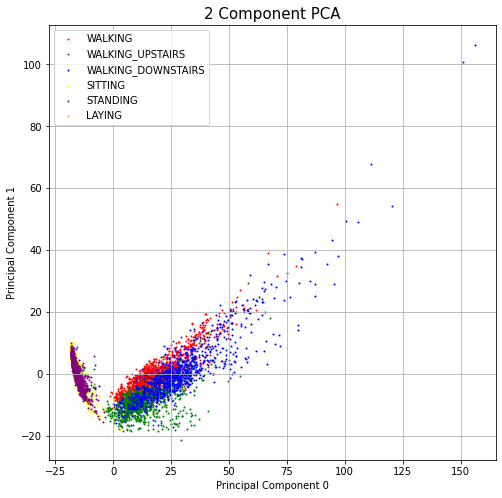

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 10)
ax.set_ylabel('Principal Component 1', fontsize = 10)
ax.set_title('2 Component PCA', fontsize = 15)


targets = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]
colors = ['r', 'g', 'b', 'yellow', 'purple','orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['activity_name'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 0']
               , principalDf.loc[indicesToKeep, 'principal component 1']
               , c = color
               , s = 1)
ax.legend(targets)
ax.grid()

## Breakdown of variance Ratio

In [80]:
NUMBER_OF_COMPONENTS = 100
print("Overall")
print(pca2.explained_variance_ratio_)
for component in range(NUMBER_OF_COMPONENTS):
    comp = pca.components_[component]
    print("Component %i explains ratio: %.6f" % ((component + 1),pca.explained_variance_ratio_[component]) )
    sorted_index = np.argsort(comp)
    #for i in reversed(range(len(sorted_index))):
        #print("%.6f\t%s" % (comp[sorted_index[i]], train_df_x.columns[sorted_index[i]]))
        #print("")

Overall
[0.52017263 0.06221704 0.0346769  0.02310699 0.01948544 0.01651018
 0.0155078  0.0141196  0.01203984 0.01034128 0.00987046 0.0086886
 0.0084436  0.00756214 0.00690848 0.00668392 0.00630784 0.00567077
 0.00542304 0.00523344 0.00499428 0.0048446  0.00446842 0.00438345
 0.00407451 0.00397725 0.00390288 0.00368901 0.00353052 0.00342183
 0.00327173 0.00325745 0.00310818 0.00307447 0.00303202 0.00291374
 0.00284448 0.00280503 0.00276598 0.00265619 0.00256524 0.00250888
 0.00247386 0.00241604 0.00237869 0.0023479  0.00217867 0.00210105
 0.00201676 0.00197261 0.00192718 0.00187416 0.00185668 0.00181008
 0.00179475 0.00173445 0.00169857 0.00167173 0.0016431  0.00158013
 0.00154494 0.00149411 0.0014696  0.00145051 0.00142022 0.00137727
 0.00136814 0.00134949 0.00133211 0.00130485 0.0012666  0.00124647
 0.00123007 0.001211   0.00119644 0.00119062 0.00116205 0.00114283
 0.00112974 0.00110804 0.0010998  0.0010803  0.00105647 0.00102263
 0.00100615 0.00099302 0.0009675  0.00094548 0.00094515

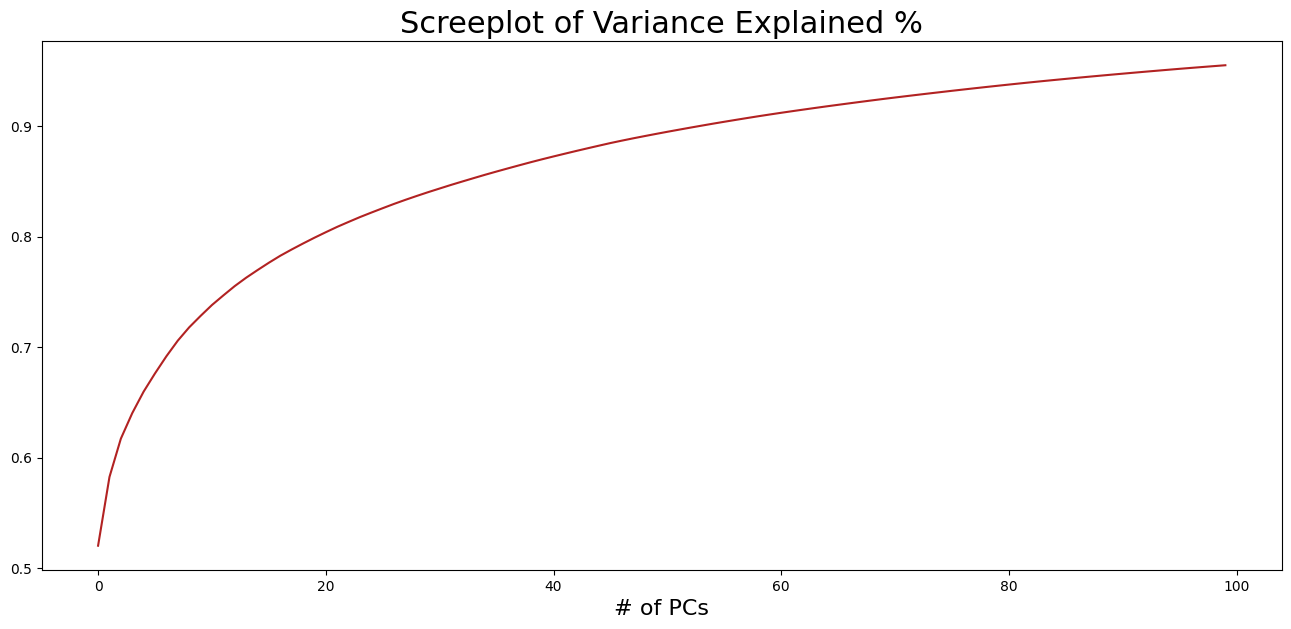

In [66]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum()
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance Explained %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.show()

In [69]:
from sklearn.svm import SVC
# Make SVC
linclass2 = SVC()
linclass2.fit(X_r,train_df_y)

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [72]:
X_red_validation = pca2.transform(train_df_transformed)
yhat_validation = linclass2.predict(X_red_validation)

y_validation = train_df_y

In [73]:
import seaborn as sns

from sklearn.metrics import confusion_matrix

def plot_cm(y_validation, yhat_validation, class_names=['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',"SITTING","STANDING","LAYING"]):
    cm = confusion_matrix(y_validation,yhat_validation)
    fig, ax = plt.subplots(figsize=(13, 11)) 
    ax = sns.heatmap(
          cm, 
          annot=True, 
          fmt="d", 
          cmap='inferno',
          ax=ax
    )

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=45)
    ax.set_title('Confusion Matrix')
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names, rotation=0)
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    plt.show() 


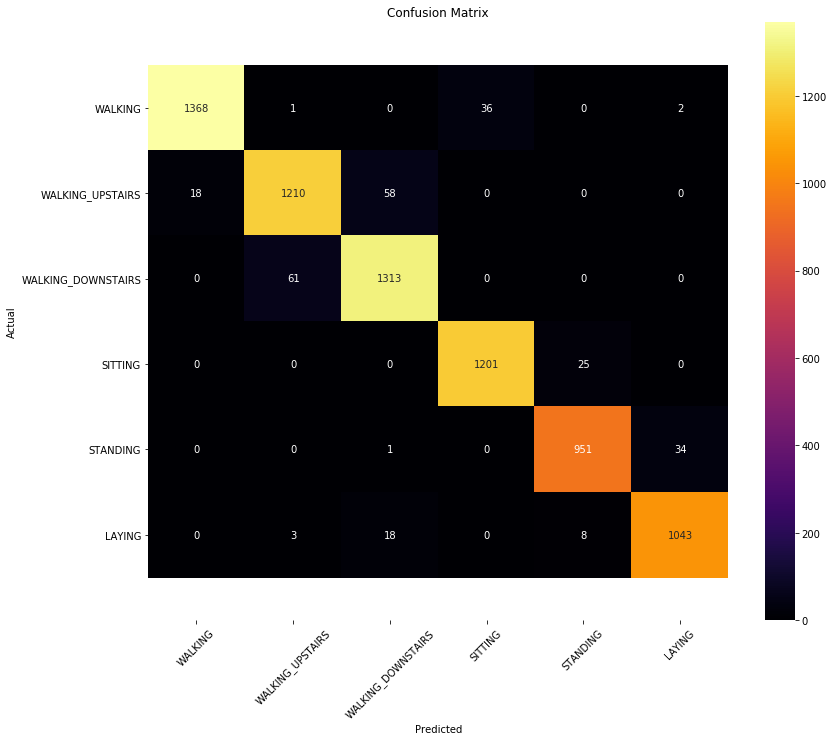

In [194]:
plot_cm(y_validation, yhat_validation,)